In [2]:
#se importan las librerias que se van a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#leo el archivo csv con el que se va a trabajar
df = pd.read_csv(r'C:\Users\pablo\Desktop\proyecto_scoring_gmsc\give me some credit\data\raw\cs-training.csv')

In [4]:
#se toma todo el csv en termino de filas, pero se toma a partir del indice 1 de columnas, ya que la columna de indice 0 es una columna indice que no nos sirve
df = df.iloc[:,1:]

In [5]:
#se ven las primeras 5 filas
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
#se ven las dimensiones del dataframe
df.shape

(150000, 11)

In [7]:
#tipos de datos, cantidas de filas y columnas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [8]:
#se verifican los nulos por columna
df.isna().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
#se ven medidas de tendencia central y distribucion de los datos, tambien se redondea a 1 decimal para mejor lectura
round(df.describe(),1)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.0,150000.0,150000.0,150000.0,150000.0,120269.0,150000.0,150000.0,150000.0,150000.0,146076.0
mean,0.1,6.0,52.3,0.4,353.0,6670.2,8.5,0.3,1.0,0.2,0.8
std,0.2,249.8,14.8,4.2,2037.8,14384.7,5.1,4.2,1.1,4.2,1.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,41.0,0.0,0.2,3400.0,5.0,0.0,0.0,0.0,0.0
50%,0.0,0.2,52.0,0.0,0.4,5400.0,8.0,0.0,1.0,0.0,0.0
75%,0.0,0.6,63.0,0.0,0.9,8249.0,11.0,0.0,2.0,0.0,1.0
max,1.0,50708.0,109.0,98.0,329664.0,3008750.0,58.0,98.0,54.0,98.0,20.0


In [10]:
df.groupby('SeriousDlqin2yrs').size()

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64

In [11]:
round(df['RevolvingUtilizationOfUnsecuredLines'].describe(percentiles=[0.01,0.05,0.95,0.99]),2)

count    150000.00
mean          6.05
std         249.76
min           0.00
1%            0.00
5%            0.00
50%           0.15
95%           1.00
99%           1.09
max       50708.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [12]:
x = df['RevolvingUtilizationOfUnsecuredLines']

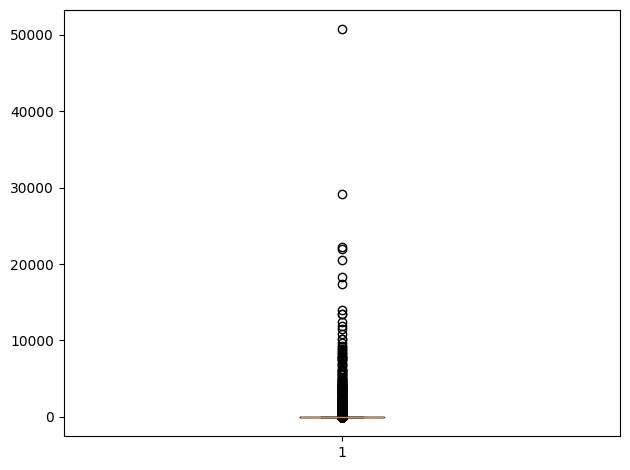

In [13]:
plt.boxplot(x)
plt.tight_layout()
plt.show()

In [14]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [17]:
df['age'].describe(percentiles=[0.01,0.05,0.95,0.99])

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
1%           24.000000
5%           29.000000
50%          52.000000
95%          78.000000
99%          87.000000
max         109.000000
Name: age, dtype: float64

In [16]:
contador=0
for c in df['age']:
    if c > 87:
        contador+=1
print(contador)

1276


In [18]:
contador=0
for c in df['age']:
    if c < 18:
        contador+=1
print(contador)

1


In [ ]:
#hay que chequear el valor maximo, ya que es la cantidad de veces que la persona entro en mora
df['NumberOfTime30-59DaysPastDueNotWorse'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.90,0.95,0.99])

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
30%           0.000000
50%           0.000000
70%           0.000000
90%           1.000000
95%           2.000000
99%           4.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [ ]:
#se chequea que edades hay cuando en la columna 'NumberOfTime30-59DaysPastDueNotWorse', es mayor a 50
df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 50][['age']]


,age
1733,27
2286,22
3884,38
4417,21
4705,21
...,...
147774,68
149153,24
149239,26
149439,34


In [ ]:
#se chequea que edades hay cuando en la columna 'NumberOfTime30-59DaysPastDueNotWorse', es igual a 98
df[df['NumberOfTime30-59DaysPastDueNotWorse'] == 98][['age']]


,age
1733,27
2286,22
3884,38
4417,21
4705,21
...,...
147774,68
149153,24
149239,26
149439,34


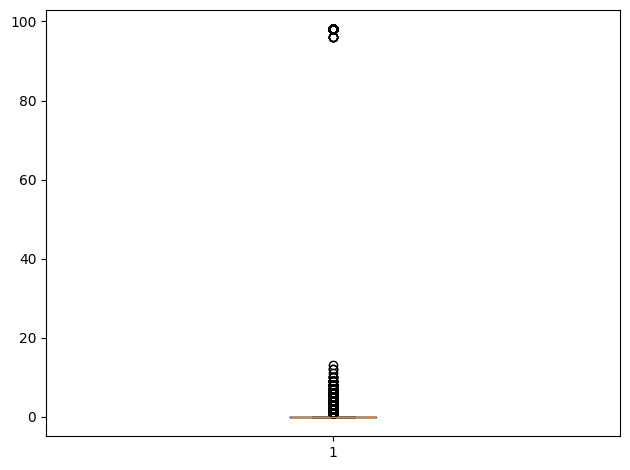

In [19]:
plt.boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'])
plt.tight_layout()
plt.show()

In [29]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [33]:
df['DebtRatio'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99])

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
1%            0.000000
5%            0.004329
10%           0.030874
30%           0.213697
50%           0.366508
70%           0.649189
80%           4.000000
82%          31.000000
85%         269.150000
90%        1267.000000
95%        2449.000000
99%        4979.040000
max      329664.000000
Name: DebtRatio, dtype: float64

In [44]:
df[df['DebtRatio'] > 4][['MonthlyIncome']].value_counts().sort_values(ascending=False)

MonthlyIncome
0.0              1499
1.0               545
500.0              23
200.0              21
100.0              16
                 ... 
16600.0             1
17300.0             1
20000.0             1
25800.0             1
33333.0             1
Name: count, Length: 235, dtype: int64

In [46]:
df['DebtRatio'].median()

np.float64(0.366507841)

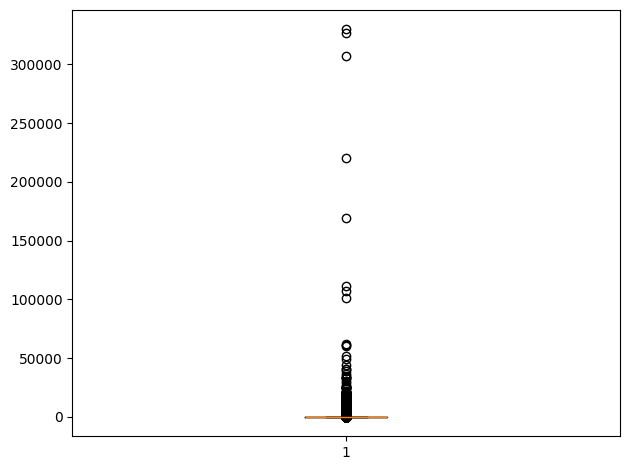

In [20]:
plt.boxplot(df['DebtRatio'])
plt.tight_layout()
plt.show()

In [48]:
round(df['MonthlyIncome'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count     120269.0
mean        6670.2
std        14384.7
min            0.0
1%             0.0
5%          1300.0
10%         2005.0
30%         3800.0
50%         5400.0
70%         7500.0
80%         9083.0
82%         9532.0
85%        10100.0
90%        11666.0
95%        14587.6
99%        25000.0
max      3008750.0
Name: MonthlyIncome, dtype: float64

In [50]:
df[df['MonthlyIncome']==3008750][['DebtRatio']]

,DebtRatio
73763,0.00147


In [51]:
df[df['MonthlyIncome'] < 500].shape


(2693, 11)

In [23]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [24]:
round(df['NumberOfOpenCreditLinesAndLoans'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count    150000.0
mean          8.5
std           5.1
min           0.0
1%            0.0
5%            2.0
10%           3.0
30%           5.0
50%           8.0
70%          10.0
80%          12.0
82%          13.0
85%          13.0
90%          15.0
95%          18.0
99%          24.0
max          58.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [25]:
round(df['NumberOfTimes90DaysLate'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count    150000.0
mean          0.3
std           4.2
min           0.0
1%            0.0
5%            0.0
10%           0.0
30%           0.0
50%           0.0
70%           0.0
80%           0.0
82%           0.0
85%           0.0
90%           0.0
95%           1.0
99%           3.0
max          98.0
Name: NumberOfTimes90DaysLate, dtype: float64

In [27]:
df[df['NumberOfTimes90DaysLate']==98].shape

(264, 11)

In [28]:
round(df['NumberRealEstateLoansOrLines'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count    150000.0
mean          1.0
std           1.1
min           0.0
1%            0.0
5%            0.0
10%           0.0
30%           0.0
50%           1.0
70%           1.0
80%           2.0
82%           2.0
85%           2.0
90%           2.0
95%           3.0
99%           4.0
max          54.0
Name: NumberRealEstateLoansOrLines, dtype: float64

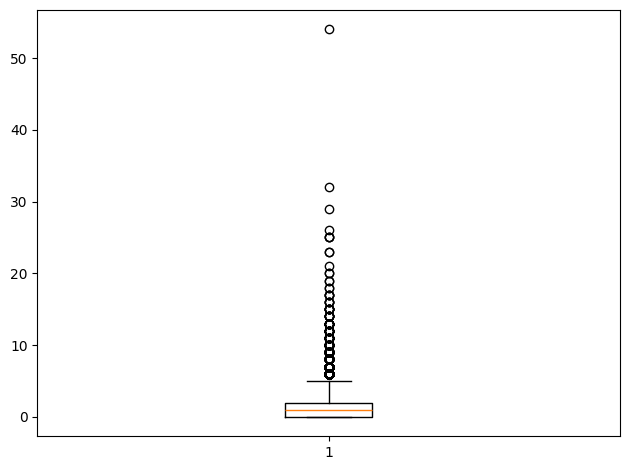

In [30]:
plt.boxplot(df['NumberRealEstateLoansOrLines'])
plt.tight_layout()
plt.show()

In [29]:
round(df['NumberOfTime60-89DaysPastDueNotWorse'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count    150000.0
mean          0.2
std           4.2
min           0.0
1%            0.0
5%            0.0
10%           0.0
30%           0.0
50%           0.0
70%           0.0
80%           0.0
82%           0.0
85%           0.0
90%           0.0
95%           1.0
99%           2.0
max          98.0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

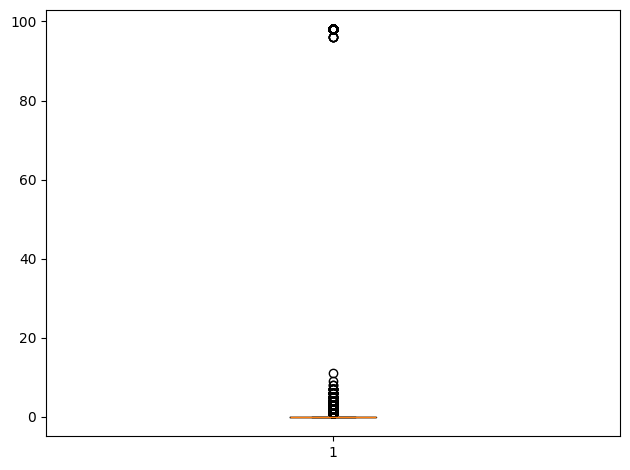

In [32]:
plt.boxplot(df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.tight_layout()
plt.show()

In [33]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [34]:
round(df['NumberOfDependents'].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.7,0.8,0.82,0.85,0.90,0.95,0.99]),1)

count    146076.0
mean          0.8
std           1.1
min           0.0
1%            0.0
5%            0.0
10%           0.0
30%           0.0
50%           0.0
70%           1.0
80%           2.0
82%           2.0
85%           2.0
90%           2.0
95%           3.0
99%           4.0
max          20.0
Name: NumberOfDependents, dtype: float64